In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-data-insights-and-trends/World_Population.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

# Setup for matplotlib
%matplotlib inline

In [3]:
world_population = pd.read_csv('/kaggle/input/world-population-data-insights-and-trends/World_Population.csv')

In [4]:
world_population.head(10)

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,1.999,28.0,36.3 %,17.8 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.19,39.0,65 %,17.7 %
2,3,United States,339996563,0.5 %,1706706,37,9147420,999700,1.662,38.0,82.9 %,4.2 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.134,30.0,59.1 %,3.4 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.347,21.0,34.7 %,3 %
5,6,Nigeria,223804632,2.41 %,5263420,246,910770,-59996,5.063,17.0,53.9 %,2.8 %
6,7,Brazil,216422446,0.52 %,1108948,26,8358140,6000,1.621,34.0,88.4 %,2.7 %
7,8,Bangladesh,172954319,1.03 %,1767947,1329,130170,-309977,1.936,27.0,40.9 %,2.1 %
8,9,Russia,144444359,-0.19 %,-268955,9,16376870,-136414,1.522,39.0,74.7 %,1.8 %
9,10,Mexico,128455567,0.75 %,951442,66,1943950,-50239,1.79,30.0,87.8 %,1.6 %


In [5]:
world_population.tail(10)

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
224,225,Wallis & Futuna,11502,-0.6 %,-70,82,140,-119,1.916,37.0,0 %,0 %
225,226,Tuvalu,11396,0.74 %,84,380,30,-60,3.105,25.0,68.8 %,0 %
226,227,Saint Barthelemy,10994,0.25 %,27,524,21,0,1.031,40.0,0 %,0 %
227,228,Saint Pierre & Miquelon,5840,-0.38 %,-22,25,230,0,1.565,44.0,N.A.,0 %
228,229,Saint Helena,5314,-1.12 %,-60,14,390,0,1.636,53.0,32 %,0 %
229,230,Montserrat,4386,-0.09 %,-4,44,100,0,1.556,44.0,11.2 %,0 %
230,231,Falkland Islands,3791,0.29 %,11,0,12170,0,1.585,40.0,61.6 %,0 %
231,232,Niue,1935,0.05 %,1,7,260,0,2.39,36.0,40.8 %,0 %
232,233,Tokelau,1893,1.18 %,22,189,10,0,2.635,27.0,0 %,0 %
233,234,Holy See,518,1.57 %,8,1295,0,0,...,NaN,N.A.,0 %


In [6]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        234 non-null    int64  
 1   Country (or dependency)  234 non-null    object 
 2   Population (2023)        234 non-null    int64  
 3   Yearly Change            234 non-null    object 
 4   Net Change               234 non-null    int64  
 5   Density  (P/Km²)         234 non-null    int64  
 6   Land Area  (Km²)         234 non-null    int64  
 7   Migrants (net)           234 non-null    int64  
 8   Fert. Rate               234 non-null    object 
 9   Med. Age                 233 non-null    float64
 10  Urban Pop %              234 non-null    object 
 11  World Share              234 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 22.1+ KB


In [7]:
missing_values = world_population.iloc[:, :10].isnull().sum()

missing_values

#                          0
Country (or dependency)    0
Population (2023)          0
Yearly Change              0
Net Change                 0
Density  (P/Km²)           0
Land Area  (Km²)           0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   1
dtype: int64

In [8]:
# Drop rows with any NaN values
world_population_dropped_rows = world_population.dropna(axis=0) 

print(world_population_dropped_rows)

       # Country (or dependency)  Population (2023) Yearly Change  Net Change  \
0      1                   India         1428627663        0.81 %    11454490   
1      2                   China         1425671352       -0.02 %     -215985   
2      3           United States          339996563         0.5 %     1706706   
3      4               Indonesia          277534122        0.74 %     2032783   
4      5                Pakistan          240485658        1.98 %     4660796   
..   ...                     ...                ...           ...         ...   
228  229            Saint Helena               5314       -1.12 %         -60   
229  230              Montserrat               4386       -0.09 %          -4   
230  231        Falkland Islands               3791        0.29 %          11   
231  232                    Niue               1935        0.05 %           1   
232  233                 Tokelau               1893        1.18 %          22   

     Density  (P/Km²)  Land

In [10]:
# Remove duplicate rows based on all columns
world_population_unique = world_population_dropped_rows.drop_duplicates()

print(world_population_unique)

       # Country (or dependency)  Population (2023) Yearly Change  Net Change  \
0      1                   India         1428627663        0.81 %    11454490   
1      2                   China         1425671352       -0.02 %     -215985   
2      3           United States          339996563         0.5 %     1706706   
3      4               Indonesia          277534122        0.74 %     2032783   
4      5                Pakistan          240485658        1.98 %     4660796   
..   ...                     ...                ...           ...         ...   
228  229            Saint Helena               5314       -1.12 %         -60   
229  230              Montserrat               4386       -0.09 %          -4   
230  231        Falkland Islands               3791        0.29 %          11   
231  232                    Niue               1935        0.05 %           1   
232  233                 Tokelau               1893        1.18 %          22   

     Density  (P/Km²)  Land

In [12]:
world_population_unique.describe()

,#,Population (2023),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Med. Age
count,233.000000,2.330000e+02,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,233.000000
mean,117.000000,3.452318e+07,3.013107e+05,473.905579,5.583429e+05,1.306867e+01,31.309013
std,67.405489,1.376633e+08,1.003778e+06,2325.067631,1.694269e+06,1.701990e+05,9.628386
min,1.000000,1.893000e+03,-2.957105e+06,0.000000,1.000000e+00,-9.104750e+05,15.000000
25%,59.000000,5.210210e+05,2.450000e+02,38.000000,2.830000e+03,-9.999000e+03,22.000000
50%,117.000000,5.742315e+06,2.865200e+04,96.000000,8.220000e+04,-5.000000e+02,32.000000
75%,175.000000,2.325148e+07,2.278660e+05,242.000000,4.103400e+05,5.000000e+02,40.000000
max,233.000000,1.428628e+09,1.145449e+07,24360.000000,1.637687e+07,1.784718e+06,54.000000


Data Visualization - Population Sizes of Top 10 Countries

In [24]:
print(world_population_unique.columns)

Index(['#', 'Country (or dependency)', 'Population (2023)', 'Yearly Change',
       'Net Change', 'Density  (P/Km²)', 'Land Area  (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')


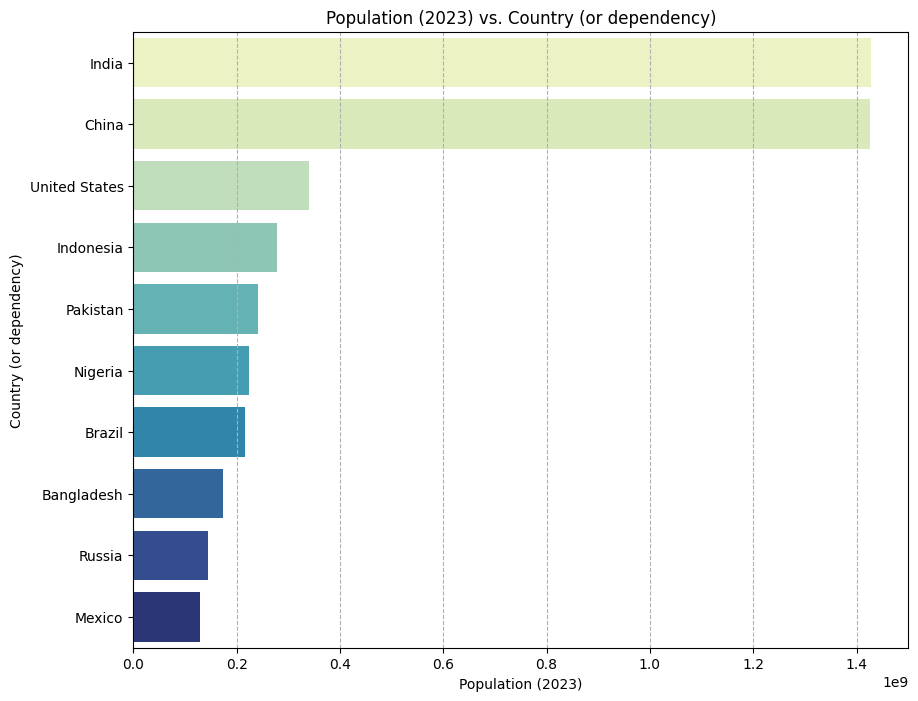

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = world_population_unique.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Population (2023)', y='Country (or dependency)', data=top_countries, palette='YlGnBu')
plt.title('Population (2023) vs. Country (or dependency)')
plt.xlabel('Population (2023)')
plt.ylabel('Country (or dependency)')
plt.grid(axis='x', linestyle='--')
plt.show()



Fertility Rates of Top 10 Countries in 2023

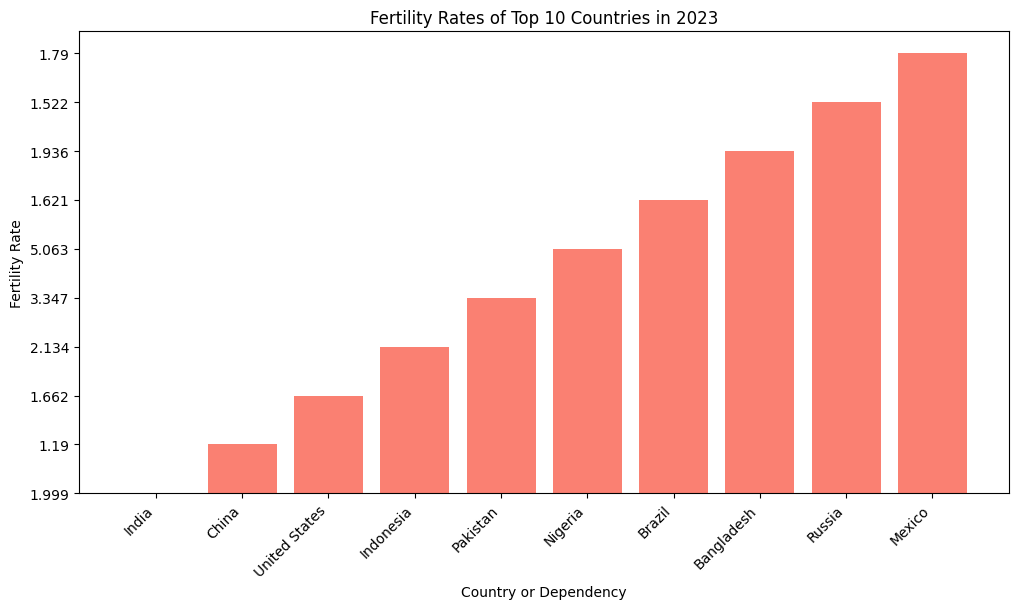

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_population = world_population_unique.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_population['Country (or dependency)'], top_10_population['Fert. Rate'], color='salmon')
plt.title('Fertility Rates of Top 10 Countries in 2023')
plt.xlabel('Country or Dependency')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=45, ha="right")
plt.show()

Urban Population Percentages of Top 10 Countries

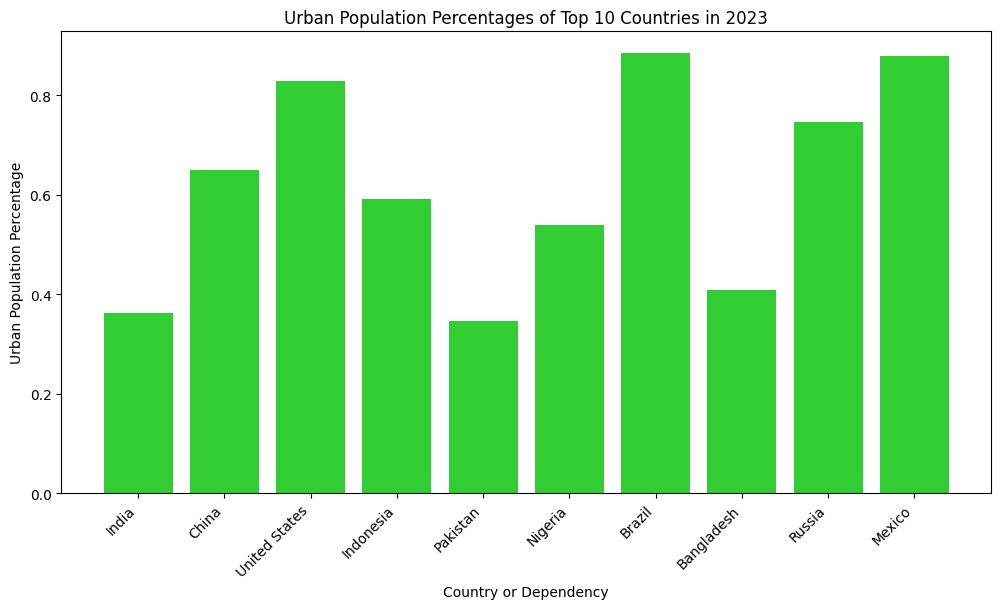

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_population = world_population_unique.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_population['Country (or dependency)'], top_10_population['Urban Pop %'], color='limegreen')
plt.title('Urban Population Percentages of Top 10 Countries in 2023')
plt.xlabel('Country or Dependency')
plt.ylabel('Urban Population Percentage')
plt.xticks(rotation=45, ha="right")
plt.show()

In [13]:
# Re-defining the columns to convert and correcting 'Urban Pop %' and 'World Share' columns
world_population_unique['Urban Pop %'] = world_population_unique['Urban Pop %'].replace('N.A.', np.nan).str.rstrip('%').astype(float) / 100.0
world_population_unique['World Share'] = world_population_unique['World Share'].str.rstrip('%').astype(float) / 100.0

# Re-defining columns for conversion to NumPy
columns_for_numpy = ['Population (2023)', 'Density  (P/Km²)', 'Land Area  (Km²)', 'Migrants (net)', 
                     'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']

# Re-attempting the conversion to NumPy array
population_data_np = world_population[columns_for_numpy].to_numpy()

# Confirming the shape of the NumPy array
population_data_np.shape

(234, 8)

In [15]:
# Basic statistics for the first column (Population)

population_stats = {
    'min': np.min(population_data_np[:, 0]),
    'max': np.max(population_data_np[:, 0]),
    'mean': np.mean(population_data_np[:, 0]),
    'median': np.median(population_data_np[:, 0]),
}

population_stats

{'min': 518,
 'max': 1428627663,
 'mean': 34375647.876068376,
 'median': 5643895.0}

 Build a neural network model using TensorFlow and Keras for predicting the median age

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Data Preprocessing
# Convert 'Fert. Rate' and 'Urban Pop %' to numeric, coercing errors to NaN
world_population['Fert. Rate'] = pd.to_numeric(world_population['Fert. Rate'], errors='coerce')
world_population['Urban Pop %'] = pd.to_numeric(world_population['Urban Pop %'].str.replace('%', ''), errors='coerce')

# Fill NaN values in all columns with the column's median
for column in ['Population (2023)', 'Density  (P/Km²)', 'Fert. Rate', 'Urban Pop %', 'Med. Age']:
    world_population[column] = world_population[column].fillna(world_population[column].median())

# Selecting features and target
features_columns = ['Population (2023)', 'Density  (P/Km²)', 'Fert. Rate', 'Urban Pop %']
target_column = 'Med. Age'
X = world_population[features_columns]
y = world_population[target_column]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Model Training
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

# Model Evaluation
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss (Mean Squared Error): {test_loss}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss (Mean Squared Error): 24.33492660522461


Feature Engineering and Model Building with Random Forest

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Assuming `world_population` is your DataFrame and has been preprocessed

# Example of a simple feature engineering: Interaction between Density and Urban Pop %
world_population['Density_Urban_Interaction'] = world_population['Density  (P/Km²)'] * world_population['Urban Pop %']

# Updated feature selection with the new feature
features_columns = ['Population (2023)', 'Density  (P/Km²)', 'Fert. Rate', 'Urban Pop %', 'Density_Urban_Interaction']
target_column = 'Med. Age'

X = world_population[features_columns]
y = world_population[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a pipeline with normalization and Random Forest model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Test MSE: 20.890712323943667


Check the best set of hyperparameters using grid_search.best_params_ and the performance of the best model with grid_search.best_score_.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a simple pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],  # Two possible values for n_estimators
    'regressor__max_depth': [None, 10, 20]  # Three possible values for max_depth
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__n_estimators': [100, 200]},
             verbose=1)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Example dataset
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model and parameters
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50],  # Number of trees in the forest
    'max_depth': [None, 10]    # Maximum depth of the tree
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)

# Running the grid search
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score found: {grid_search.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'max_depth': None, 'n_estimators': 10}
Best score found: 0.8632650170710768
